# Predicting Student Admissions with Neural Networks
In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:
- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1-4)

The dataset originally came from here: http://www.ats.ucla.edu/

## Loading the data
To load the data and format it nicely, we will use two very useful packages called Pandas and Numpy. You can read on the documentation here:
- https://pandas.pydata.org/pandas-docs/stable/
- https://docs.scipy.org/

In [2]:
import numpy as np
import pandas as pd 

# get teh data and reading it 
df = pd.read_csv('student_data.csv')

# show the data

df.head()


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


## Plotting the data

First let's make a plot of our data to see how it looks. In order to have a 2D plot, let's ingore the rank.

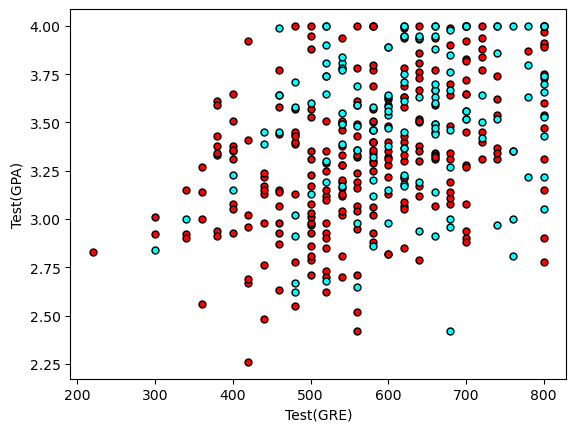

In [14]:
# matplotlib to plot the data 
import matplotlib.pyplot as plt

# build function to help plot the data

def plot_points(df):
    X = np.array(df[["gre","gpa"]])
    y = np.array(df["admit"])
    
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    
    plt.xlabel('Test(GRE)')
    plt.ylabel('Test(GPA)')
    
plot_points(df)
plt.show()

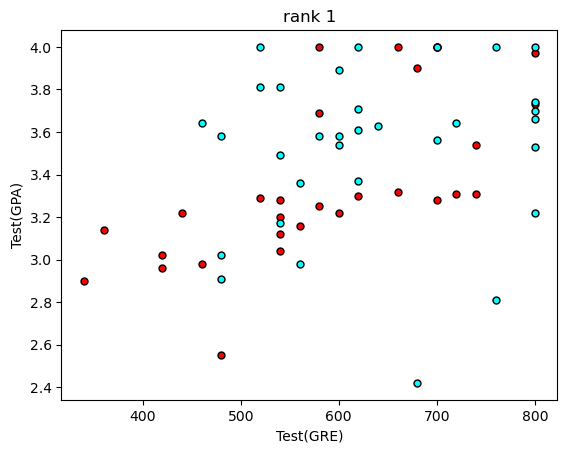

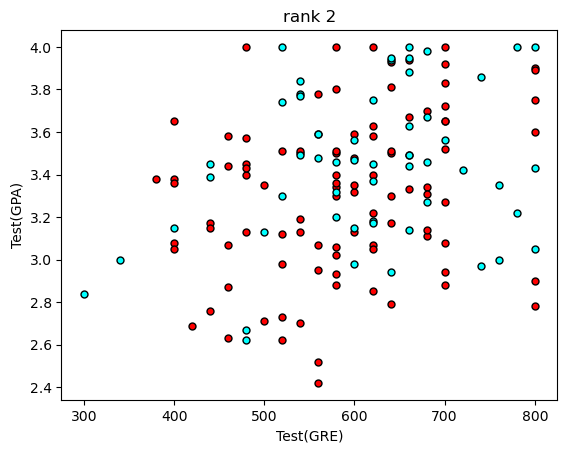

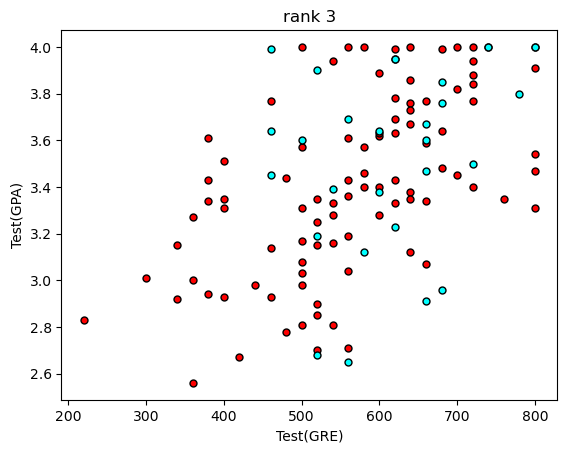

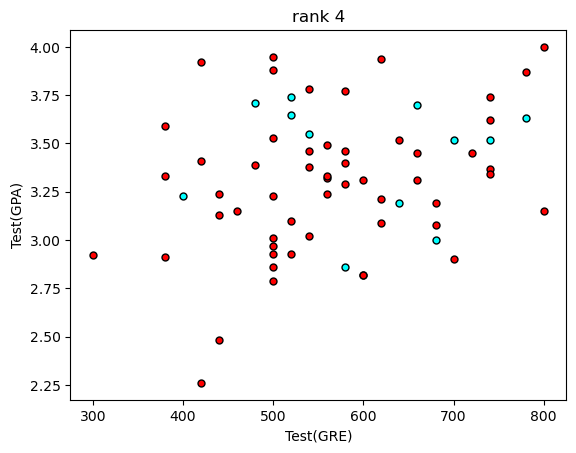

In [15]:
# Separating ranking in data to be able to visulize more

data_rank1 = df[df["rank"]==1]
data_rank2 = df[df["rank"]==2]
data_rank3 = df[df["rank"]==3]
data_rank4 = df[df["rank"]==4]


# plot data

plot_points(data_rank1)
plt.title("rank 1")
plt.show()

plot_points(data_rank2)
plt.title("rank 2")
plt.show()

plot_points(data_rank3)
plt.title("rank 3")
plt.show()

plot_points(data_rank4)
plt.title("rank 4")
plt.show()

In [16]:
# built dummpy varaible to rank

one_hot_data = pd.concat([df,pd.get_dummies(df['rank'],prefix='rank')],axis =1)


# drop rank column
one_hot_data = one_hot_data.drop('rank',axis=1)

one_hot_data.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


## TODO: Scaling the data
The next step is to scale the data. We notice that the range for grades is 1.0-4.0, whereas the range for test scores is roughly 200-800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

In [17]:
# Copying our data
processed_data = one_hot_data[:]

processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0

processed_data.head()


,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1


In order to test our algorithm, we'll split the data into a Training and a Testing set. The size of the testing set will be 10% of the total data.

In [18]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 360
Number of testing samples is 40
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
257      1  0.775  0.9875       0       0       1       0
90       0  0.875  0.9575       0       1       0       0
342      0  0.625  0.9875       0       0       0       1
212      0  0.575  0.7175       0       1       0       0
19       1  0.675  0.9525       1       0       0       0
304      0  0.275  0.7075       0       0       1       0
4        0  0.650  0.7325       0       0       0       1
144      0  0.725  0.8500       0       0       0       1
321      0  0.575  0.8950       0       1       0       0
12       1  0.950  1.0000       1       0       0       0
    admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
11      0  0.550  0.8050       1       0       0       0
13      0  0.875  0.7700       0       1       0       0
16      0  0.975  0.9675       0       0       0       1
23      0  0.850  0.7975       0       0       0       1
39      1  

## Splitting the data into features and targets (labels)
Now, as a final step before the training, we'll split the data into features (X) and targets (y).

In [19]:
features = train_data.drop('admit',axis=1)
targets = train_data['admit']
features_test = test_data.drop('admit',axis=1)
targets_test = test_data['admit']

print(features[:10])
print(targets[:10])

       gre     gpa  rank_1  rank_2  rank_3  rank_4
257  0.775  0.9875       0       0       1       0
90   0.875  0.9575       0       1       0       0
342  0.625  0.9875       0       0       0       1
212  0.575  0.7175       0       1       0       0
19   0.675  0.9525       1       0       0       0
304  0.275  0.7075       0       0       1       0
4    0.650  0.7325       0       0       0       1
144  0.725  0.8500       0       0       0       1
321  0.575  0.8950       0       1       0       0
12   0.950  1.0000       1       0       0       0
257    1
90     0
342    0
212    0
19     1
304    0
4      0
144    0
321    0
12     1
Name: admit, dtype: int64


## Training the 2-layer Neural Network
The following function trains the 2-layer neural network. First, we'll write some helper functions.

In [24]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# TODO: Backpropagate the error
Now it's your turn to shine. Write the error term. Remember that this is given by the equation $$ (y-\hat{y}) \sigma'(x) $$

In [25]:
# Error term formula

def error_term_formula(x,y,output):
    return (y - output)*sigmoid_prime(x)


In [28]:
# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.2739262363345288
Epoch: 100
Train loss:  0.20915928880041462
Epoch: 200
Train loss:  0.20632038034162395
Epoch: 300
Train loss:  0.2048948753998793
Epoch: 400
Train loss:  0.20414423057309752
Epoch: 500
Train loss:  0.20371094896013303
Epoch: 600
Train loss:  0.20342978320892963
Epoch: 700
Train loss:  0.20322381242202908
Epoch: 800
Train loss:  0.20305650080729556
Epoch: 900
Train loss:  0.2029100973672579
Finished training!


In [29]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.625
